In [2]:
import pandas as pd

# we restrict this (very large) dataset to the variables of interest
columns = ['id', 'year', 'age', 'sex', 'grass', 'degree', 'partyid','happy']
df = pd.read_stata("GSS7218_R1.dta", columns=columns)

# further limit dataset to the years we are interested in
df = df.loc[df['year'].isin({2010})]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex      grass          degree            partyid  \
53043     1  2010  31.0    male        NaN        bachelor   NOT STR DEMOCRAT   
53044     2  2010  23.0  female      legal        bachelor   NOT STR DEMOCRAT   
53045     3  2010  71.0  female        NaN  LT HIGH SCHOOL    STRONG DEMOCRAT   
53046     4  2010  82.0  female  NOT LEGAL  LT HIGH SCHOOL  STRONG REPUBLICAN   
53047     5  2010  78.0  female  NOT LEGAL  LT HIGH SCHOOL        independent   
...     ...   ...   ...     ...        ...             ...                ...   
55082  2040  2010  62.0    male        NaN        bachelor  STRONG REPUBLICAN   
55083  2041  2010  66.0  female  NOT LEGAL     HIGH SCHOOL  STRONG REPUBLICAN   
55084  2042  2010  54.0  female      legal     HIGH SCHOOL   NOT STR DEMOCRAT   
55085  2043  2010  57.0  female      legal        bachelor        independent   
55086  2044  2010  30.0    male      legal     HIGH SCHOOL        OTHER PARTY  

In [3]:
# limit dataset to exclude records from individuals who didn't answer this survey
df = df.loc[df['grass'].notna()]

#remove people with no value for age
df = df.loc[df['happy'].notna()]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex      grass          degree            partyid  \
53044     2  2010  23.0  female      legal        bachelor   NOT STR DEMOCRAT   
53046     4  2010  82.0  female  NOT LEGAL  LT HIGH SCHOOL  STRONG REPUBLICAN   
53047     5  2010  78.0  female  NOT LEGAL  LT HIGH SCHOOL        independent   
53048     6  2010  40.0    male      legal  LT HIGH SCHOOL    STRONG DEMOCRAT   
53051     9  2010  31.0  female  NOT LEGAL     HIGH SCHOOL    STRONG DEMOCRAT   
...     ...   ...   ...     ...        ...             ...                ...   
55081  2039  2010  63.0    male  NOT LEGAL     HIGH SCHOOL       IND,NEAR REP   
55083  2041  2010  66.0  female  NOT LEGAL     HIGH SCHOOL  STRONG REPUBLICAN   
55084  2042  2010  54.0  female      legal     HIGH SCHOOL   NOT STR DEMOCRAT   
55085  2043  2010  57.0  female      legal        bachelor        independent   
55086  2044  2010  30.0    male      legal     HIGH SCHOOL        OTHER PARTY  

47.962519936204146


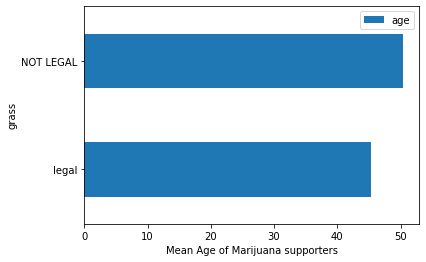

In [5]:
df = df.replace('89 OR OLDER', 89)
df['age'] = pd.to_numeric(df['age'])
print(df['age'].mean())

import matplotlib.pyplot as plt
df.groupby('grass')['age'].mean().plot(kind='barh')
plt.xlabel('Mean Age of Marijuana supporters')
plt.legend();